In [1]:
# Sean Castaneda
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [2]:
#read in the churn dataset
churn = pd.read_csv("Churn-Modelling.csv")
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# make sure we do not have any missing data
churn.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
print ("\nUnique values :  \n",churn.nunique())


Unique values :  
 RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [7]:
# 1. separate the qualitative from quantitative
#2. Independent variables (aka features) and dependent variable (target)

#qualitative variables (categorical variables)
cat_features = ["Geography","HasCrCard","IsActiveMember","Gender"]

#numerical variables (but can only take decimal numbers)
float_features = ["Balance","EstimatedSalary"]

#numerical variables (but can only take integers)
int_features = ["Age", "CreditScore", "Tenure", "NumOfProducts"]

#variables to drop/useless
useless = ["RowNumber", "CustomerId","Surname"]

# dependent variable 
target = "Exited"

## Visualizations

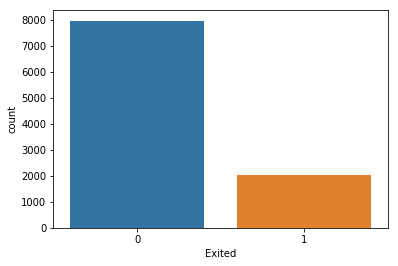

In [55]:
graph1 = sns.countplot(churn[target])

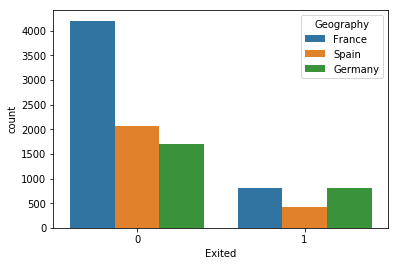

In [56]:
graph2 = sns.countplot(churn[target], hue = churn["Geography"])

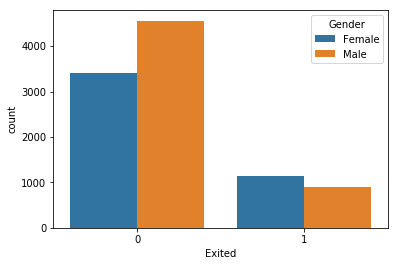

In [57]:
graph3 = sns.countplot(churn[target], hue = churn["Gender"])

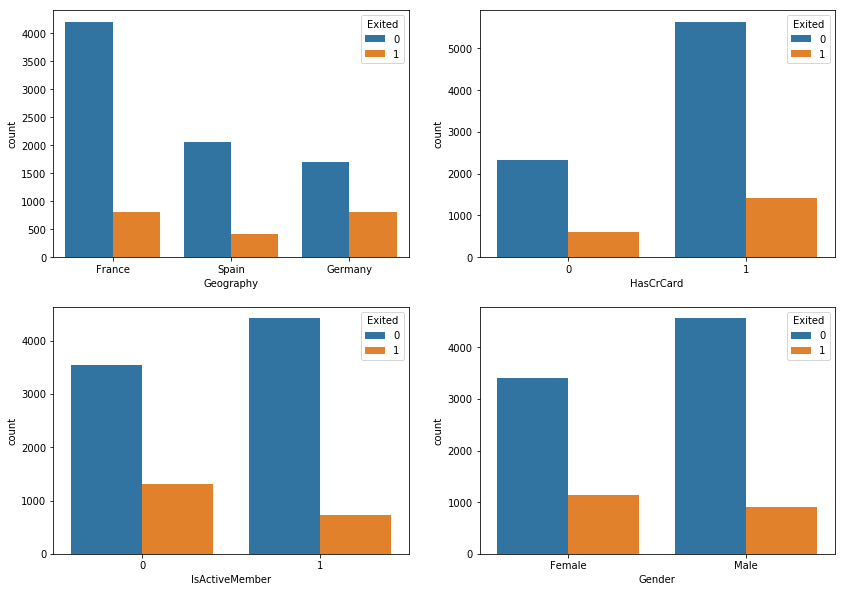

In [10]:
# print categorical/qualitative graphs in one go
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14,10))

for feature, ax in zip(cat_features, axes.flat):
    plot = sns.countplot(x=feature, hue=target, data= churn, ax=ax)

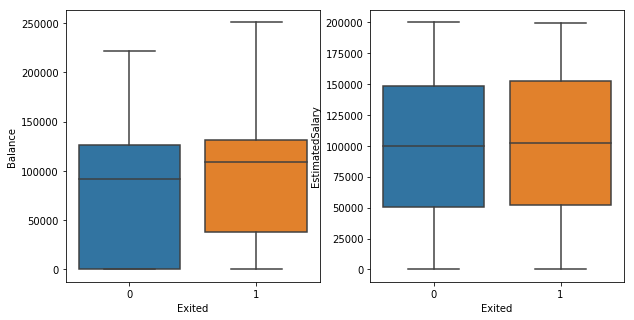

In [16]:
# plotting float features
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

for feature, ax in zip(float_features, axes.flat):
    plot = sns.boxplot(x=target, y=feature, data= churn, ax=ax, showfliers= False)

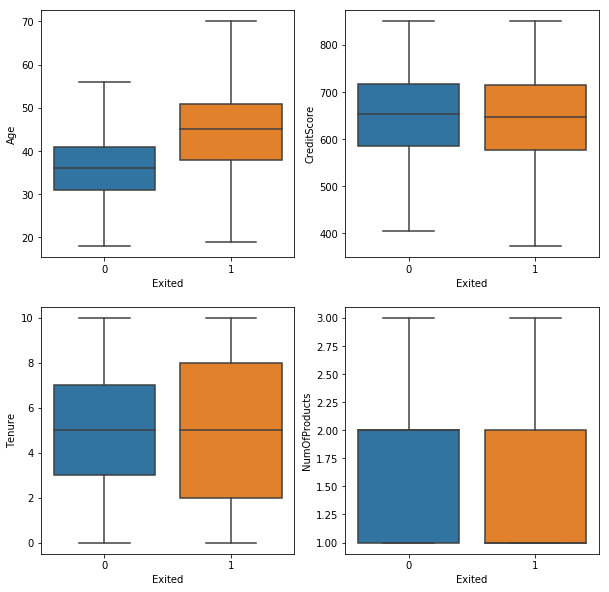

In [18]:
#plotting integer feature
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

for feature, ax in zip(int_features, axes.flat):
    plot = sns.boxplot(x=target, y=feature, data= churn, ax=ax, showfliers= False)

In [19]:
# correlation matrix
corr = churn.drop(columns = useless).corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


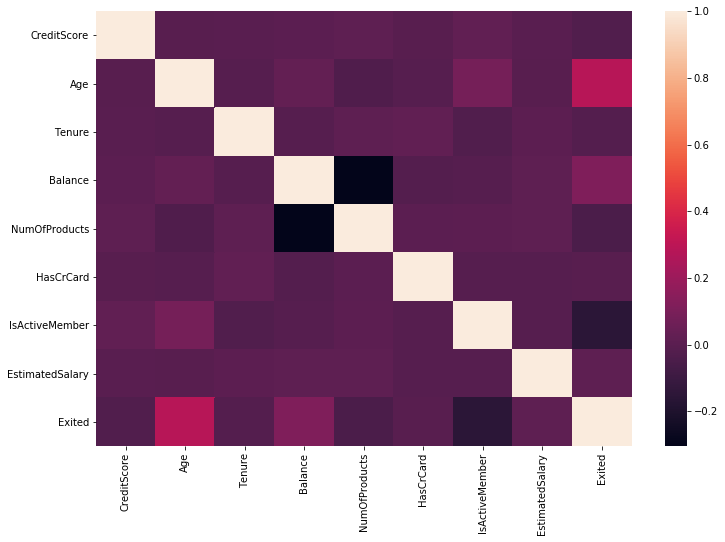

In [20]:
# with corr^, we can make heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr)

## Feature selection and data cleaning

In [38]:
#drop the useless variables
df = churn.drop(useless,axis=1)

In [39]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Machine Learning works best when we encode the categorical data

### In this dataset, we have two categorical variables -geography and gender.
To represent a categorical variable, we introduce dummy variables.

A categorical variable with K label, can be represented by k-1 dummy variables.

For example, Geography has 3 (france spain germany), this can be introduced by 2 dummy variables.

One way to introduce the dummy variables is using one-hot encoding. In this process, we take spain france germany and represent them with columns. IN each column, we us a 1 to designate that the category exists for the current row, and a 0 is not.

## Logic to encode


The get_dummies method of the pandas library converts categorical columns to numeric columns. Then, .iloc[:,1:] ignores the first column and returns the rest of the columns (germany and spain). As noted above, this is becasue wwe can always represent "n" categories with "n-1" columns.

In [40]:
# to demonstrate the one hot encoding, I am  dropping the categorical features first and then after hot encoding
# I will concatenate the dummy variables back to the df
df = df.drop(cat_features, axis =1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0


In [41]:
Geography = pd.get_dummies(churn.Geography).iloc[:,1:]
Gender = pd.get_dummies(churn.Gender).iloc[:,1:]

In [42]:
HasCrCard =pd.get_dummies(churn.HasCrCard).iloc[:,1:]
IsActiveMember =pd.get_dummies(churn.IsActiveMember).iloc[:,1:]

In [43]:
Geography.head()
# first record is france as both germany/spain are 0

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [44]:
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [45]:
df = pd.concat([df,Geography,Gender,HasCrCard,IsActiveMember],axis=1)

In [47]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Germany,Spain,Male,1,1
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1


## Data Preprocessing

In [48]:
copydf = df[:]

In [49]:
copydf.drop("Exited",axis = 1, inplace= True)

/opt/tcnjhpc/Python-3.6.0/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [50]:
copydf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Germany,Spain,Male,1,1
0,619,42,2,0.00,1,101348.88,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,0,1,1


In [51]:
x = copydf[:]
y = df["Exited"]

In [52]:
x.head()
y

0       1
1       0
2       1
3       0
4       0
5       1
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    1
9976    0
9977    0
9978    0
9979    0
9980    0
9981    1
9982    1
9983    0
9984    0
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    1
9992    0
9993    0
9994    0
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=79)

In [55]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(7000, 11) (3000, 11)
(7000,) (3000,)


In [56]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

In [57]:
modelnb = GaussianNB()

In [58]:
modelnb.fit(x_train, y_train)

GaussianNB(priors=None)

In [59]:
prednb = modelnb.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [61]:
accuracy_score(prednb, y_test)

0.7866666666666666

In [62]:
confusion_matrix(prednb, y_test)

array([[2316,  574],
       [  66,   44]])

# Naive Bayes Accuracy was 78.67%
## Misclassification observations is 574+66= 640

In [63]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [64]:
# Build the model 
modellr = LogisticRegression()

In [65]:
# Fit the model
modellr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
# Predict on the test dataset
predlr =modellr.predict(x_test)

In [67]:
accuracy_score(predlr, y_test)

0.7856666666666666

In [68]:
confusion_matrix(predlr,y_test)

array([[2315,  576],
       [  67,   42]])

# Logistic Regression Accuracy is 78.5%
## Missclassification observations is 576+67= 643

In [69]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [70]:
modeldt = DecisionTreeClassifier()

In [71]:
#fit the model
modeldt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
preddt = modeldt.predict(x_test)

In [73]:
accuracy_score(preddt,y_test)

0.7943333333333333

In [74]:
confusion_matrix(preddt, y_test)

array([[2044,  279],
       [ 338,  339]])

# Decision Tree Accuracy is 79.43%
## Misclassifion is 279+338=617